# Samples from Gaussian distribution

The obejctive of this work is to create a dataset by drawing samples belonging to two distinct Gaussian distributions. Control the Gaussian mean and variance to overlap the two classes. 

#### Reference:
This notebook was created by modifying an example from: https://github.com/peterroelants/peterroelants.github.io/blob/main/notebooks/misc/multivariate-normal-primer.ipynb

In [1]:
%reset -f

In [2]:
# Imports
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm # Colormaps
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import pandas as pd

sns.set_style('darkgrid')
np.random.seed(42)
#

### Multivariate normal distribution

The multivariate normal distribution is a multidimensional generalisation of the one-dimensional Gaussian distribution. It represents the distribution of a multivariate random variable that is made up of multiple random variables that can be correlated with each other.

Like the normal distribution, the multivariate normal is defined by sets of parameters: the mean vector $\mu$, which is the expected value of the distribution; and the covariance matrix $\Sigma$, which measures how dependent two random variables are and how they change together.

The multivariate normal with dimensionality $d$ has a joint probability density given by:


$$
p(\mathbf{x} \mid \mathbf{\mu}, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp{ \left( -\frac{1}{2}(\mathbf{x} - \mathbf{\mu})^T \Sigma^{-1} (\mathbf{x} - \mathbf{\mu}) \right)}
$$



The multivariate normal distribution for random vector $x$ of size $d$, where $\mu$ is the mean vector and $\Sigma$ is the (symmetric, positive definite) covariance matrix (of size $d$ x $d$) is denoted as:


$$
\mathcal{N}(\mathbf{\mu}, \Sigma)
$$


In [3]:
def multivariate_normal(x, d, mean, covariance):
    """pdf of the multivariate normal distribution."""
    x_m = x - mean
    return (1. / (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance))) * 
            np.exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m)) / 2))

In [4]:
# Plot bivariate distribution
def generate_surface(mean, covariance, d):
    """Helper function to generate density surface."""
    nb_of_x = 50 # grid size
    x1s = np.linspace(-6, 10, num=nb_of_x)
    x2s = np.linspace(-6, 10, num=nb_of_x)
    x1, x2 = np.meshgrid(x1s, x2s) # Generate grid
    pdf = np.zeros((nb_of_x, nb_of_x))
    # Fill the cost matrix for each combination of weights
    for i in range(nb_of_x):
        for j in range(nb_of_x):
            pdf[i,j] = multivariate_normal(
                np.matrix([[x1[i,j]], [x2[i,j]]]), 
                d, mean, covariance)
    return x1, x2, pdf  # x1, x2, pdf(x1,x2)

# subplot
#fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
#d = 2  # number of dimensions

# Plot of independent Normals
#bivariate_mean = np.matrix([[0.], [0.]])  # Mean
#bivariate_covariance = np.matrix([
#    [1., 0.], 
#    [0., 1.]])  # Covariance
#x1, x2, p = generate_surface(
#    bivariate_mean, bivariate_covariance, d)
# Plot bivariate distribution
#con = ax1.contourf(x1, x2, p, 33, cmap=cm.YlGnBu)
#ax1.set_xlabel('$x_1$', fontsize=13)
#ax1.set_ylabel('$x_2$', fontsize=13)
#ax1.axis([-2.5, 2.5, -2.5, 2.5])
#ax1.set_aspect('equal')
#ax1.set_title('Independent variables', fontsize=12)

# Plot of correlated Normals
#bivariate_mean = np.matrix([[0.], [1.]])  # Mean
#bivariate_covariance = np.matrix([
#    [1., 0.8], 
#    [0.8, 1.]])  # Covariance
#x1, x2, p = generate_surface(
#    bivariate_mean, bivariate_covariance, d)
# Plot bivariate distribution
#con = ax2.contourf(x1, x2, p, 33, cmap=cm.YlGnBu)
#ax2.set_xlabel('$x_1$', fontsize=13)
#ax2.set_ylabel('$x_2$', fontsize=13)
#ax2.axis([-2.5, 2.5, -1.5, 3.5])
#ax2.set_aspect('equal')
#ax2.set_title('Correlated variables', fontsize=12)

# Add colorbar and title
#fig.subplots_adjust(right=0.8)
#cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
#cbar = fig.colorbar(con, cax=cbar_ax)
#cbar.ax.set_ylabel('$p(x_1, x_2)$', fontsize=13)
#plt.suptitle('Bivariate normal distributions', fontsize=13, y=0.95)
#plt.show()
#

### Affine transformations of the multivariate normal
 
It is possible to transform a [multivariate normal](https://en.wikipedia.org/wiki/Multivariate_normal_distribution#Affine_transformation) distribution into a new normal distribution with an [affine transformation](https://en.wikipedia.org/wiki/Affine_transformation).

To transform a multivariate normal distribution into a new normal distribution with an affine transformation:
If $X$ is normally distributed and $Y = LX + u$ with $L$ a [linear transformation](https://en.wikipedia.org/wiki/Linear_map) and $u$ a vector then $Y$ is also normally distributed with mean $\mu_{Y} = u + L\mu_{X}$ and covariance matrix $\Sigma_{Y} = L\Sigma_{X}L^T$: 

$$Y \sim \mathcal{N}(\mu_{Y}, \Sigma_{Y}) \quad\quad X \sim \mathcal{N}(\mu_{X}, \Sigma_{X}) \\
\mathcal{N}(\mu_{Y}, \Sigma_{Y}) = \mathcal{N}(u + L\mu_{X}, L\Sigma_{X}L^T) = L\mathcal{N}(\mu_{X}, \Sigma_{X}) + u$$

The proof of transformation is in the original notebook referenced above.


## Sampling from a multivariate normal

The previous formula helps to [sample from any multivariate Guassian](https://en.wikipedia.org/wiki/Multivariate_normal_distribution#Drawing_values_from_the_distribution).  
First, sample $X$ from the standard normal distribution $X \sim \mathcal{N}(0, I_d)$, where the mean is the vector $\mu=0$ and the covariance is the [identity matrix](https://en.wikipedia.org/wiki/Identity_matrix) $\Sigma=I_d$. Sampling from this distribution is easier because each variable in $X$ is [independent](https://en.wikipedia.org/wiki/Linear_independence) from all other variables, we can just sample each variable separately.

It is then possible to sample $Y$ from $\mathcal{N}(\mu_{Y}, \Sigma_{Y})$ by sampling $X$ and applying the affine transform on the samples. This transform is $Y = LX + u$ where we know from the previous section that the covariance of $Y$ will be $\Sigma_{Y} = L\Sigma_{X}L^\top$. Since $\Sigma_{X}=I_d$ we can write that $\Sigma_{Y} = L I_d L^\top = L L^\top$. $L$ can now be found by a technique called the [Cholesky decompostion](https://en.wikipedia.org/wiki/Cholesky_decomposition) which does exactly the decomposition we need. 

The vector $u$ is then $\mu_{Y}$ since $\mu_{X}=0$ ($u = \mu_{Y} - L\mu_{X}$).


$$
Y
\sim
\mathcal{N}\left(
\begin{bmatrix} 0 \\ 
1 
\end{bmatrix},
\begin{bmatrix}
1 & 0.8 \\
0.8 & 1
\end{bmatrix}\right)
$$

The sampling is done by the following code and the samples are plotted as red dots on the probability density surface generated below.

Here, we define the gaussians for the two classes, the mean and covarience for each gaussian in the mixture. Class one has three gaussians and class 2 has 4. Compute $L$ using [Cholesky decompostion] and apply the above transformation $Y = LX + u$ that gives the samples $Y$. We also add labels to identify the samples in each clases (to use a binary classifier in the following section).

##### Mean and Covariance values for creating data with a specific train/tesst AUC  

| Test/Train | AUC | mean11 | mean12 | mean13 | mean21| mean22| mean23 | mean24| covariance11 | covariance12 | covariance13 | covariance21 | covariance22 | covariance23 | covariance24|
|-------------|-----| -----|-----|-----|------|------|------|-----|-----|------|------|------|------|------|------|
|Test&Train | 0.863 |-2,-1| 0,0 |1,1 |1,-1 |2,0 |5,2 |2,1 |0.8 |0.6 |0.3 |0.2 |0.5 |0.6 |0.6 |
|Test | 0.838 |-2,-1| 0,0 |1,1 |1,-1 |3,0 |5,2 |2,1 |0.8 |0.6 |0.3 |0.2 |0.5 |0.6 |0.6 |
|Test | 0.8302 |-2,-1| 0,0 |1,1 |1,-1 |3,0 |3,2 |2,1 |0.8 |0.6 |0.3 |0.2 |0.4 |0.6 |0.6 |
|Test | 0.8403 |-2,-1| 0,0 |1,2 |1,0 |3,1 |3,3 |2,1 |0.8 |0.6 |0.3 |0.3 |0.4 |0.7 |0.2 |
|Test | 0.8203 |-3,-1| 0,0 |1,1 |1,0 |2,-1 |3,3 |3,1 |0.5 |0.5 |0.4 |0.4 |0.3 |0.4 |0.5 |
|Test | 0.805 |-2,-1| 0,0 |1,2 |1,1 |3,1 |3,3 |2,1 |0.8 |0.6 |0.3 |0.2 |0.5 |0.6 |0.6 |
|Test | 0.810 |-2,-1| 0,0 |1,1 |1,0 |2,0 |3,2 |2,1 |0.8 |0.6 |0.3 |0.2 |0.4 |0.5 |0.6 |
|Train | 0.910 |-2,-1| 0,0 |1,2 |1,-2 |3,1 |6,3 |2,1 |0.8 |0.6 |0.3 |0.2 |0.5 |0.6 |0.6 |
|Train | 0.773 |-2,-1| 0,0 |1,2 |1,0 |2,1 |4,3 |-1,-1 |0.8 |0.6 |0.3 |0.2 |0.5 |0.6 |0.6 |
|Train | 0.702 |-2,-1| 0,0 |1,2 |1,1 |2,2 |4,3 |-1,-1 |0.8 |0.6 |0.3 |0.2 |0.5 |0.6 |0.6 |

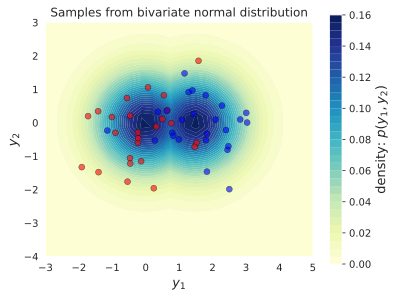

In [5]:
# Sample from:
d = 2 # Number of dimensions per Gaussian
# Define the mean for Gaussian in Class1
mean11 = np.matrix([[0.], [0.]])

# Define the mean for each Gaussian in Class2
mean21 = np.matrix([[1.47], [0.]])  

# Define the covarience for Gaussian in Class1
covariance11 = np.matrix([
[1, 0],
[0, 1]
])

# Define the covarience for Gaussian in Class2
covariance21 = np.matrix([
[1, 0],
[0, 1]
])

# Create L for each Gaussian and concatenate in Class 1
L11 = np.linalg.cholesky(covariance11)

# Create L for each Gaussian and concatenate in Class 2
L21 = np.linalg.cholesky(covariance21)

#-----------------------------Class 1--------------------------
# Sample X from standard normal for Class 1
n = 25 # Samples to draw(initial=50) this was 3000 in all the previous data created so far

X11 = np.random.normal(size=(d, n))


# Create a col of 0s for label 0 (Class1)
label_0 = np.zeros(shape = (n,1), dtype = int)
#print(label_0.shape)

# Apply the transformation
Y11 = L11.dot(X11) + mean11


#Create Y and append the values for Class 1
Y11 = np.array(Y11)

#Y1 = np.concatenate((Y11.T))
# Add lablels to Class1
Y_l0 = np.append(Y11.T, label_0, axis = 1)


# Plot the samples and the distribution for CLass 1
fig, ax = plt.subplots(figsize=(6, 4.5))
# Plot bivariate distribution for Class 1
x11, x12, p11 = generate_surface(mean11, covariance11, d) # Call this multiple times

x11 = np.array(x11)
x12 = np.array(x12)


X11 = np.concatenate((x11))
X12 = np.concatenate((x12))

p11 = np.array(p11)

p1 = np.concatenate((p11))

#-----------------------------Class 2--------------------------
# Sample X from standard normal for Class 2
X21 = np.random.normal(size=(d, n))

# Apply the transformation
Y21 = L11.dot(X21) + mean21


# Create a col of 0s for label 0 (Class 1)
label_1 = np.ones(shape = (n,1), dtype = int)

#Create Y and append the values for Class 2
Y21 = np.array(Y21)

#Y2 = np.concatenate((Y21.T))
#Y2 = np.concatenate((Y21,Y22,Y23,Y24)) #deleted Y24 for sanity check

#Y2 = np.concatenate((Y21.T,Y22.T,Y23.T)) #sanity check - comment when not
# Add lablels to Class2
#Y_l1 = np.append(Y1, label_1, axis = 1) # sanity check
Y_l1 = np.append(Y21.T, label_1, axis = 1)


# Plot the samples and the distribution for CLass 2
#fig, ax = plt.subplots(figsize=(6, 4.5))
# Plot bivariate distribution for Class 2
x21, x22, p21 = generate_surface(mean21, covariance21, d) # Call this multiple times


x21 = np.array(x21)
x22 = np.array(x22)

X21 = np.concatenate((x11,x21))
X22 = np.concatenate((x12,x22))

#X21 = np.concatenate((x11,x13,x15,x21,x23,x25))
#X22 = np.concatenate((x12,x14,x16,x22,x24,x26))

p21 = np.array(p21)

p2 = np.concatenate((p11,p21))
#p2 = np.concatenate((p11,p12,p13,p21,p22,p23))

# Plot All samples
#----------------------------------------------------
con = ax.contourf(X21, X22, p2, 33, cmap=cm.YlGnBu)
# Plot samples
ax.plot(Y_l0[:,0], Y_l0[:,1],'ro', alpha=.6, markeredgecolor='k', markeredgewidth=0.5)
ax.plot(Y_l1[:,0], Y_l1[:,1],'bo', alpha=.6, markeredgecolor='k', markeredgewidth=0.5)

ax.set_xlabel('$y_1$', fontsize=13)
ax.set_ylabel('$y_2$', fontsize=13)
#ax.axis([-2.5, 2.5, -1.5, 3.5])
ax.axis([-3, 5, -4, 3])
ax.set_aspect('equal')
ax.set_title('Samples from bivariate normal distribution')
cbar = plt.colorbar(con)
cbar.ax.set_ylabel('density: $p(y_1, y_2)$', fontsize=13)
#plt.savefig('foo.png')
plt.show()
#


In [6]:
data = np.concatenate((Y_l0,Y_l1))
print(data.shape)

(50, 3)


In [7]:
def gaussian_data(n, mean11, mean21, covariance11, covariance21):
    """Draw n samples from the Gaussian Distribution"""
    d = 2 # Number of dimensions per Gaussian
    # Define the mean for Gaussian in Class1
    #mean11 = np.matrix([[0.], [0.]])

    # Define the mean for each Gaussian in Class2
    #mean21 = np.matrix([[1.91], [0.]])  

    # Define the covarience for Gaussian in Class1
    #covariance11 = np.matrix([
    #[1, 0],
    #[0, 1]
    #])

    # Define the covarience for Gaussian in Class2
    #covariance21 = np.matrix([
    #[1, 0],
    #[0, 1]
    #])

    # Create L for each Gaussian and concatenate in Class 1
    L11 = np.linalg.cholesky(covariance11)

    # Create L for each Gaussian and concatenate in Class 2
    L21 = np.linalg.cholesky(covariance21)
    #-----------------------------Class 1--------------------------
    # Sample X from standard normal for Class 1
    #n = 8000 # Samples to draw(initial=50) this was 3000 in all the previous data created so far

    X11 = np.random.normal(size=(d, n))


    # Create a col of 0s for label 0 (Class1)
    label_0 = np.zeros(shape = (n,1), dtype = int)
    #print(label_0.shape)

    # Apply the transformation
    Y11 = L11.dot(X11) + mean11


    #Create Y and append the values for Class 1
    Y11 = np.array(Y11)

    #Y1 = np.concatenate((Y11.T))
    # Add lablels to Class1
    Y_l0 = np.append(Y11.T, label_0, axis = 1)


    # Plot the samples and the distribution for CLass 1
    #fig, ax = plt.subplots(figsize=(6, 4.5))
    # Plot bivariate distribution for Class 1
    x11, x12, p11 = generate_surface(mean11, covariance11, d) # Call this multiple times

    x11 = np.array(x11)
    x12 = np.array(x12)


    X11 = np.concatenate((x11))
    X12 = np.concatenate((x12))

    p11 = np.array(p11)

    p1 = np.concatenate((p11))

    #-----------------------------Class 2--------------------------
    # Sample X from standard normal for Class 2
    X21 = np.random.normal(size=(d, n))

    # Apply the transformation
    Y21 = L11.dot(X21) + mean21


    # Create a col of 0s for label 0 (Class 1)
    label_1 = np.ones(shape = (n,1), dtype = int)

    #Create Y and append the values for Class 2
    Y21 = np.array(Y21)

    #Y2 = np.concatenate((Y21.T))
    #Y2 = np.concatenate((Y21,Y22,Y23,Y24)) #deleted Y24 for sanity check

    #Y2 = np.concatenate((Y21.T,Y22.T,Y23.T)) #sanity check - comment when not
    # Add lablels to Class2
    #Y_l1 = np.append(Y1, label_1, axis = 1) # sanity check
    Y_l1 = np.append(Y21.T, label_1, axis = 1)
    data = np.concatenate((Y_l0,Y_l1))
    #print(data.shape)
    return data

Concatenate the samples from the two classes generated above and save the dataset. 

In [8]:
# Define the mean for Gaussian in Class1
mean11 = np.matrix([[0.], [0.]])

# Define the mean for each Gaussian in Class2
mean21_83 = np.matrix([[1.35], [0.]])  #1.37 -> 0.8332, 1.35 -> 0.8306
mean21_86 = np.matrix([[1.553], [0.]]) #1.57 -> 0.865, 1.55-> 0.8634, 1.59 -> 0.8709, 1.559-> 0.8621, 1.553-> 0.860028

# Define the covarience for Gaussian in Class1
covariance11 = np.matrix([
[1, 0],
[0, 1]
])

# Define the covarience for Gaussian in Class2
covariance21 = np.matrix([
[1, 0],
[0, 1]
])

n = 10000
data = gaussian_data(n, mean11, mean21_86, covariance11, covariance21)
#data = gaussian_data(n, mean11, mean21_83, covariance11, covariance21)  #check the AUC

### Multi Layer Perceptron (MLP) Classifier
The multilayer perceptron (MLP) is a feedforward artificial neural network model that maps sets of input data onto a set of appropriate outputs where the mapping between inputs and output is non-linear. An MLP consists of multiple layers and each layer is fully connected to the following one. The nodes of the layers are neurons using nonlinear activation functions, except for the nodes of the input layer. There can be one or more non-linear hidden layers between the input and the output layer.

A Multilayer Perceptron has input and output layers, and one or more hidden layers with many neurons stacked together. In this example, we define an MLP with an input layer with 2 neurons, two hidden layers with 4 neurons each and one neuron in the output layer. MLP classifier is set to use 'relu' as the activation function and 'adam' as the solver for weight optimization. After fiting the model to the training data, the trained model is used to generate predictions on the train and test data, respectively.

In [9]:
# Multi Layer Perceptron (MLP) Classifier

samples = data[:,[0,1]]  #try out the new distribution on classifier
labels = data[:,2]

#samples = data86[:,[0,1]]  #Use the AUC0.86 data for drift simulation
#labels = data86[:,2]

# Load the required libraries
import sklearn
#print(samples.shape)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('always') 
warnings.filterwarnings('ignore')

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(samples, labels, test_size=0.20, random_state=5)
#print(X_train.shape)
#print(X_test.shape)

# Build the Classifier Model and fit the model to the training data
mlp = MLPClassifier(hidden_layer_sizes=(4,4), activation='relu', solver='adam', max_iter=2000,learning_rate_init=0.001,learning_rate="constant",random_state=4,shuffle=True,batch_size=8)
#mlp.fit(X_train,y_train)
mlp.fit(samples,labels)

#predict_train = mlp.predict(samples)
predict_train = mlp.predict_proba(samples)

#predict_train = mlp.predict(X_train)
#predict_test = mlp.predict(X_test)

#Evaluate the model - Training Performance
#---------------------------------------------------------------------
#from sklearn.metrics import classification_report,confusion_matrix

#print the confusion matrix and the confusion report results on the train data
#print(confusion_matrix(y_train,predict_train))
#print(classification_report(y_train,predict_train))

#tn, fp, fn, tp = confusion_matrix(y_train,predict_train).ravel()
#specificity = tn / (tn+fp)

#AUC = roc_auc_score(y_train,predict_train)
#print("Train: Specificity:", specificity)
#print("Train: AUC:", AUC)
#print(predict_train.shape)

#Evaluate the model - Training Performance
#---------------------------------------------------------------------
from sklearn.metrics import classification_report,confusion_matrix

#print the confusion matrix and the confusion report results on the train data
#print(confusion_matrix(labels,predict_train))
#print(classification_report(labels,predict_train))

#tn, fp, fn, tp = confusion_matrix(labels,predict_train).ravel()
#specificity = tn / (tn+fp)

AUC = roc_auc_score(labels,predict_train[:,1])
#print("Train: Specificity:", specificity)
print("Train: AUC:", AUC)
#print(predict_train.shape)

Train: AUC: 0.8626407199999999


In [9]:
X_train.shape
#data.shape

(20000, 3)

In [59]:
# Loss Curve
#plt.plot(mlp.loss_curve_)
#y_test

#### Test the classifier

In [20]:
# Samples from the new distribution -  Test this on the trained classifier to get the required AUC
new_samples = data[:,[0,1]]
new_labels = data[:,2]

X_train, X_test80, y_train, y_test80 = train_test_split(new_samples, new_labels, test_size=0.80, random_state=5)


#predict_test = mlp.predict(X_test80)
predict_test = mlp.predict_proba(X_test80)

# Performance on test data
#-------------------------------------------------------------------

#print the confusion matrix and the confusion report results on the test data
#print(confusion_matrix(y_test80,predict_test))
#print(classification_report(y_test80,predict_test))
#tn, fp, fn, tp = confusion_matrix(y_test80,predict_test).ravel()
#specificity = tn / (tn+fp)


AUC = roc_auc_score(y_test80,predict_test[:,1])
#print("Test Specificity:", specificity)
print("Test AUC:", AUC)

Test AUC: 0.8312745957415558


#### Test AUC for 50 samples per day

In [82]:
# Samples from the new distribution -  Test this on the trained classifier to get the required AUC
new_samples = data[:,[0,1]]
new_labels = data[:,2]

#X_train, X_test80, y_train, y_test80 = train_test_split(new_samples, new_labels, test_size=0.20, random_state=5)


#predict_test = mlp.predict(new_samples)
predict_test = mlp.predict_proba(new_samples)

# Performance on test data
#-------------------------------------------------------------------

#print the confusion matrix and the confusion report results on the test data
#print(confusion_matrix(new_labels,predict_test))
#print(classification_report(new_labels,predict_test))
#tn, fp, fn, tp = confusion_matrix(new_labels,predict_test).ravel()
#specificity = tn / (tn+fp)


AUC = roc_auc_score(new_labels,predict_test[:,1])
#print("Test Specificity:", specificity)
print("Test AUC:", AUC)

Test AUC: 0.8263398899999999


##### Sudden Drift 
Run 1000 simulations of:
 - Day 0-999 &emsp;&nbsp;&nbsp; -  AUC 0.86 &nbsp;(in-control data)
 - Day 1000-1999 – AUC 0.83

Save the test AUCs for the changepoint detection using CUSUM algorithm. 

#####  Evaluate:
#False Positives, #True Positives, #False Negatives, average, minimum and maximum delay to detect the change point. Each experiment either has multiple FPs and one TP (or missed detection -> False Negatives). Once all the FPs and one TP is detected, break out of the loop.
Mean Time Between False Alarms is computed in the pre-change regime and Average Detection Delay in the post-change regime.

In [10]:
import glob, os

#GaussianSamples86 = np.empty((0,3))
#GaussianSamples83 = np.empty((0,3))


#--------------------------------------------------------------------------------
#-----------NEW Data from Gaussian-----------------------------------------------
#--------------------------------------------------------------------------------
os.chdir("/home/smriti.prathapan/note1/GaussData-March0724/")
GaussianSamples86 = np.load('G86-March0724-3000days1000Sim.npy')     #in-control  Data1
os.chdir("/home/smriti.prathapan/note1/GaussData-March0724/") 
GaussianSamples83 = np.load('G83-March0724-3000days1000Sim.npy')     #out-of-control
#os.chdir("/home/smriti.prathapan/note1/GaussData-March0724/D86-Mar10")
#GaussianSamples86 = np.load('2-Gaussian86-10S-1000D.npy')
#os.chdir("/home/smriti.prathapan/note1/GaussData-March0724/D83-Mar10")
#GaussianSamples83 = np.load('53-Gaussian83-10S-1000D.npy')

In [11]:
GaussianSamples86.shape

(114000000, 3)

In [11]:
# Simulate 2000 days - Samples from AUC(0.86) from day 0-999 and AUC(0.83) from day1000-1999
runs = 0
FalsePos         =  np.array([])
TruePos          =  np.array([])
DelaytoDetect    =  np.array([])
FAR              =  np.array([])     #False Alarm Rate
inSTD_test_AUCs  =  np.array([])     #Standard deviation of test AUCs
outSTD_test_AUCs =  np.array([]) 
AUC_in           =  np.array([])     #Mean ACUs
AUC_out          =  np.array([])
Displacement     =  np.array([])     #Displacement (shift in mean)
k_1000           =  np.array([])
#DetectionTimes=  np.array([])
DetectionTimes   =  np.array([],dtype=int) #save the FP detection times
Dj               =  np.array([],dtype=int) #save the Dj which are binary values indicating detection
Zj               =  np.array([],dtype=int) #save the Zj = min(Tj,pre-change-days)
zj               =  np.array([],dtype=int) # ADD - MLE of delays
cj               =  np.array([],dtype=int) # ADD - binary
AvgDD            = np.array([])       # Average Detection Delay
#Save the in-control and out-of-control specificities - mean AUCs here
sp_pre           = np.array([])
sp_post          = np.array([])
#D86             = np.array([])
#D83             = np.array([])
pre_change_days  = 1000
post_change_days = 1000
total_days       = pre_change_days + post_change_days
sample_size      = 50
start_86         = 0
end_86           = 1
start_83         = 0
end_83           = 1
#delta            = 2 #0.616  #0.1481 #0.318 try 1, 2 and 3
ref_val          = 1

while (runs < 1000):   #was 8 from the 10S 1000 D data NOW 4 from 150M data
    test_days   = 0
    test_AUC    =  np.array([])
    pred_86     =  np.empty([0, 2])
    pred_83     =  np.empty([0, 2])
    D86         =  np.empty([0, 3])
    D83         =  np.empty([0, 3])
    #start_86    = 0
    #end_86      = 1
    #start_83    = 0
    #end_83      = 1
    #print("Sim:",runs)
    while (test_days < pre_change_days):     #day0-99 from AUC(0.86) June2->changed to 0-999 of AUC0.86
        test_samples = np.array([])
        test_labels  = np.array([])
        
        #Draw n samples per day-------------------------------------------------------------
        #n = 25
        #data = gaussian_data(n, mean11, mean21_86, covariance11, covariance21) # prallelize, 
        #-----------removed the above lines since it adds a lot of delay--------------------
        start  = start_86 * sample_size
        end    = end_86 * sample_size
        data86 = GaussianSamples86[start:end,:]
        D86    = np.append(D86, data86, axis=0)    #Combine the data from the first Gaussian
        #print("86:Start and end", start, end)
        #print("Sim: day:",runs, test_days)
        
        #Separate the test samples and labels
        test_samples = data86[:,[0,1]]
        test_labels  = data86[:,2]
        
        #Test the Classifier using the new samples and append the AUCs for Changepoint Detection
        #predict_test    = mlp.predict(test_samples)
        pred_test_proba = mlp.predict_proba(test_samples)
        #pred_86         = np.append(pred_86, pred_test_proba, axis=0) #Combine the AI class raw  predictions probabilities -pre-change
        
        #tn, fp, fn, tp = confusion_matrix(test_labels,pred_test_proba[:,1]).ravel()
        #specificity    = tn / (tn+fp)
        AUC            = roc_auc_score(test_labels,pred_test_proba[:,1])
        sp_pre         = np.append(sp_pre, AUC)    #Combine for histogram
        test_AUC       = np.append(test_AUC, AUC)
        test_days     += 1
        start_86      += 1
        end_86        += 1
    
    while (test_days < total_days):    #day100-199 from AUC(0.83)  June2->changed to 1000-1999 of AUC0.83
        test_samples83 = np.array([])
        test_labels83  = np.array([])
        
        #Draw n samples per day------------------------------------------------
        #n = 25
        #data = gaussian_data(n, mean11, mean21_83, covariance11, covariance21)
        #----------removed the above lines since it adds a lot of delay--------
        start  = start_83 * sample_size
        end    = end_83 * sample_size
        data83 = GaussianSamples83[start:end,:]
        D83    = np.append(D83, data83, axis=0)    #Combine the data from the second Gaussian
        #print("83:Start and end", start, end)
        #print("Sim: day:",runs, test_days)
        
        #Separate the test samples and labels
        test_samples83 = data83[:,[0,1]]
        test_labels83  = data83[:,2]
        
        #Test the Classifier using the new samples and append the AUCs for Changepoint Detection
        #predict_test83    = mlp.predict(test_samples83)
        pred_test_proba83 = mlp.predict_proba(test_samples83)
        #pred_83           = np.append(pred_83, pred_test_proba83, axis=0) #Combine the AI class raw predictions probabilities -post-change
        
        #tn83, fp83, fn83, tp83 = confusion_matrix(test_labels83,pred_test_proba83[:,1]).ravel()
        #specificity83          = tn83 / (tn83+fp83)
        AUC83                  = roc_auc_score(test_labels83,pred_test_proba83[:,1])
        sp_post                = np.append(sp_post, AUC83)      #Combine for histogram
        test_AUC               = np.append(test_AUC, AUC83)
        test_days             += 1
        start_83              += 1
        end_83                += 1
        
    #CUSUM for day0-2000: outcomes are detection delay and #FP, #TP, MTBFA, False alarm rate
    num_rows        = np.shape(test_AUC)[0]
    in_control_auc  = test_AUC[:pre_change_days]
    out_control_auc = test_AUC[pre_change_days:total_days]
    out_std_auc     = np.std(out_control_auc)
    in_std_auc      = np.std(in_control_auc)
    x               = np.array(test_AUC)

    mu     = np.mean(in_control_auc)
    mu_1   = np.mean(out_control_auc)
    std    = np.std(in_control_auc)
    std_1  = np.std(out_control_auc)
    d      = np.abs((mu_1-mu)/std)

    #h      = 0.176  #0.176 #0.22     # Upper/lower control limit to detect the changepoint
    #h      = 0.18 #0.176 #0.22
    #k      = 0.03    # Drift 0.05 is the 2 sigma change that we wish to detect, 0.025 - one-sigma change
    h       = in_std_auc * 5
    #k      = (delta * in_std_auc)/2
    k       = ref_val * in_std_auc
    
    #print("k:", k)

    
    x_mean = np.zeros(num_rows,dtype=float)
    #S_hi : for positive changes --------------------------
    S_hi = np.zeros(num_rows,dtype=float)
    S_hi[0] = 0.0 # starts with 0
    #Increase in mean = x-mu-k ----------------------------
    mean_hi = np.zeros(num_rows,dtype=float)

    #Decrease in mean = mu-k-x----------------------------
    mean_lo = np.zeros(num_rows,dtype=float)
    #S_lo : for negative changes --------------------------
    S_lo = np.zeros(num_rows,dtype=float)
    S_lo[0] = 0.0 # starts with 0
     #CUSUM: Cumulative sum of x minus mu ------------------
    cusum = np.zeros(num_rows,dtype=float)
    cusum[0] = 0.0 # initialize with 0
    
    for i in range(0, num_rows):
        x_mean[i]  = x[i] - mu  #x_mean 
        mean_hi[i] = x[i] - mu - k
        S_hi[i]    = max(0, S_hi[i-1] + mean_hi[i])
        mean_lo[i] = mu - k - x[i]
        S_lo[i]    = max(0, S_lo[i-1] + mean_lo[i])
        cusum[i]   = cusum[i-1] + x_mean[i]

    x_mean  = np.round(x_mean,decimals=2)
    S_hi    = np.round(S_hi,decimals=2)
    mean_lo = np.round(mean_lo,decimals=2)
    S_lo    = np.round(S_lo,decimals=2)
    cusum   = np.round(cusum,decimals=2)

    # Construct the tabular CUSUM Chart
    chart = np.array([])
    chart = np.column_stack((x.T, x_mean.T, mean_hi.T, S_hi.T, mean_lo.T, S_lo.T, cusum.T))
    np.round(chart, 2)

    #d = 2 *(np.log((1-0.01) / (0.0027)))
    #h = d * 0.5 # h= d*k where k=0.5
    #h = 4 # as per the NIST doc on CUSUM

    #l1 =  np.append(num_rows, data_tabular, axis = 1)
    #l1 = np.concatenate(num_rows.T, data_tabular.T)
    #chart = np.column_stack((num_rows.T, data_tabular.T))
    #chart

    np.set_printoptions(suppress=True, formatter={'float_kind':'{:0.2f}'.format})
    #print("CUSUM Chart is:\n", np.round(chart,decimals=2))
    #x_mean

    df = pd.DataFrame(chart) 
    df.columns = ['X','x-mu','Increase in Mean', 'S_hi', 'Decrease-in-mean', 'S_lo', 'CUSUM']
    #filename = "file%d" %runs
    #df.to_csv(("CUSUM-out/file%d.csv" %runs), sep='\t')    
    #print(df.to_string())
    #print(chart)
    #Export datafrae to png
    #import dataframe_image as dfi
    #dfi.export(df,'CUSUM-out/CUSUM-run.png')
    
    
    # False positives and Total alarms
    falsePos = 0
    alarms   = 0
    delay    = 0
    avddd    = 0   # this is the delay from the paper: td-ts (z_k-v) where v is the changepoint and z_k is the time of detection
    #MTBFA    = 0
    #D        =  np.array([],dtype=int) #save the Dj which are binary values indicating detection
    #Z        =  np.array([],dtype=int) #save the Zj = min(Tj,pre-change-days) min(i, S_hi[i-1] + mean_hi[i])
    
    for i in range(0, pre_change_days):
        if (S_lo[i] > h or S_hi[i]):   
            falsePos += 1  #False Positives 
            DetectionTimes= np.append(DetectionTimes, i) 
            Dj = np.append(Dj, 1)
            Zj = np.append(Zj, min(i,pre_change_days))
            #print("time false alarm",i)
            #DetectionTimes= np.append(DetectionTimes, i)   #time at which a false positive is detected
            #print("detection times",DetectionTimes)
            #print("detection times size",DetectionTimes.size)
            break
        #if (S_lo[i] > h):   
            #if (i>100):  
                #alarms += 1        #True Positive: break after detecting one TP
                #delay   = i-100+1    # ts is 100 because the change starts at day100
                #avddd   = i-100
            #break
    if falsePos == 0:
         Dj = np.append(Dj, 0)
         #DetectionTimes[runs] = pre_change_days
         Zj = np.append(Zj, pre_change_days)
    # Delay to detect the first changepoint
    #delay = 0
    for i in range(pre_change_days, total_days):
           if ((S_lo[i] > h) or (S_hi[i] > h)):
                    alarms += 1        #True Positive: break after detecting one TP
                    #delay  = i-1000+1    # ts is 100 because the change starts at day100
                    avddd  = i-pre_change_days
                    cj = np.append(cj, 1)
                    zj = np.append(zj, min(avddd,total_days))
                    break
    
    # If there is no true detection, zj = total simulation days, cj = 0
    if alarms == 0:
        cj = np.append(cj, 0)
        #DetectionTimes[runs] = pre_change_days
        zj = np.append(zj, total_days)
    
    #Calculate MTBFA(Mean time time between False Alarms)
    #MTBFA = np.mean(DetectionTimes)
    #FlaseAlarmRate = 1/MTBFA
    
    FalsePos         = np.append(FalsePos, falsePos)
    TruePos          = np.append(TruePos, alarms)
    #DelaytoDetect = np.append(DelaytoDetect, delay)   # td-ts+1
    #FAR           = np.append(FAR, FlaseAlarmRate)
    #DetectionTimes= np.append(DetectionTimes, detectionTime)
    AvgDD            = np.append(AvgDD, avddd)   # ADD estimate from the paper
    k_1000         = np.append(k_1000, k)
    inSTD_test_AUCs  = np.append(inSTD_test_AUCs, in_std_auc)
    AUC_in           = np.append(AUC_in, mu)
    AUC_out          = np.append(AUC_out, mu_1)
    outSTD_test_AUCs = np.append(outSTD_test_AUCs, out_std_auc)
    Displacement     = np.append(Displacement, d)
    #print(falsePos)
    runs += 1  # continue until 1000 runs        

In [12]:
print("--------------------------------")
print("Control Limit:\t", h/np.mean(inSTD_test_AUCs))
print("Norm.Reference Value:\t", k/np.mean(inSTD_test_AUCs))
print("Pre/Post Change Days:\t", pre_change_days)
print("Samples per day:\t", sample_size)
print("--------------------------------")
print("total number of False Positives:",np.sum(FalsePos))
print("Total True Positives:",np.sum(TruePos))
print("Total False Negatives:",runs-np.sum(TruePos))
print("Average Detection Delay",np.mean(AvgDD))
print("Average Detection Delay NEW:",np.sum(zj)/np.sum(cj))
print("Minimum Delay",np.min(AvgDD))
print("Maximum Delay",np.max(AvgDD))
MTBFA = np.mean(DetectionTimes)
MLP = np.sum(Dj)/np.sum(Zj)
MTBFA_new = 1/MLP
FlaseAlarmRate = 1/MTBFA
print("MTBFA", MTBFA)
print("MTBFA new", MTBFA_new)
print("Flase Alarm Rate", FlaseAlarmRate)
print("Mean ref. Value", np.mean(k_1000))  
print("Mean std of in-control AUCs:",np.mean(inSTD_test_AUCs))
print("Mean Displacement:", np.mean(Displacement))
print ("mu_0", mu)
print ("mu_1", mu_1)
print("Mean in-control AUC:\t", np.mean(sp_pre))
print("Mean out-of-control AUC:\t", np.mean(sp_post))
nonZeroAvgDD = AvgDD[np.nonzero(AvgDD)]
#print("Average Detection Delay, ADD from paper is",np.mean(nonZeroAvgDD))
#print("standard deviations of in-control AUCs:",np.mean(inSTD_test_AUCs))
#print("standard deviations of out-of-control AUCs:",outSTD_test_AUCs)

--------------------------------
Control Limit:	 5.185808036844944
Norm.Reference Value:	 1.0371616073689889
Pre/Post Change Days:	 1000
Samples per day:	 50
--------------------------------
total number of False Positives: 1000.0
Total True Positives: 1000.0
Total False Negatives: 0.0
Average Detection Delay 78.9
Average Detection Delay NEW: 78.9
Minimum Delay 18.0
Maximum Delay 203.0
MTBFA 2.6
MTBFA new 2.5999999999999996
Flase Alarm Rate 0.3846153846153846
Mean ref. Value 0.0514769172365952
Mean std of in-control AUCs: 0.0514769172365952
Mean Displacement: 0.6585994573496705
mu_0 0.8608704
mu_1 0.8268096
Mean in-control AUC:	 0.86286536
Mean out-of-control AUC:	 0.8289843199999997


In [14]:
(mu-mu_1)/std

0.6379635725250408

In [27]:
#-------------------------------------------
#-------Save the AUCs in one simulation
#-------------------------------------------
os.chdir("/home/smriti.prathapan/note1")

# convert AUCs into dataframe 
#data_AUC = pd.DataFrame(test_AUC) 


# save the dataframe as a csv file 
#data_AUC.to_csv("/home/smriti.prathapan/note1/AUC-onesimulation.csv")

#Convert the Gaussian inputs to dataframe
#input_D86 = pd.DataFrame(D86) 
#input_D83 = pd.DataFrame(D83) 

#Save the Gaussian inputs to a csv file
#input_D86.to_csv("/home/smriti.prathapan/note1/D86-onesimulation.csv")
#input_D83.to_csv("/home/smriti.prathapan/note1/D83-onesimulation.csv")

#Convert the AI predictions to dataframe
#out_pred_86 = pd.DataFrame(pred_86) 
#out_pred_83 = pd.DataFrame(pred_83)

#Save the AI predictions to a csv file
#out_pred_86.to_csv("/home/smriti.prathapan/note1/pred_proba_86-onesimulation.csv")
#out_pred_83.to_csv("/home/smriti.prathapan/note1/pred_proba_83-onesimulation.csv")

# Save the 1000 simulations * 1000 pre- and pos-change AUCs into dataframe 
preChange_AUC_1000S_1000D = pd.DataFrame(sp_pre) 
postChange_AUC_1000S_1000D = pd.DataFrame(sp_post) 

# save the 1000 simulations * 1000 pre- and pos-change AUCs as a csv file 
preChange_AUC_1000S_1000D.to_csv("/home/smriti.prathapan/note1/preChange_AUC_1000S_1000Dh5k%d.csv" %ref_val)
postChange_AUC_1000S_1000D.to_csv("/home/smriti.prathapan/note1/postChange_AUC_1000S_1000Dh5k%d.csv" %ref_val)

# Save the detection delays into dataframe (1000 simulations)
#zj_1000S   = pd.DataFrame(zj) 
#cj_1000S   = pd.DataFrame(cj) 
#avdd_1000S = pd.DataFrame(AvgDD) 

# Save the detection delays into csv (1000 simulations)
#zj_1000S.to_csv("/home/smriti.prathapan/note1/zj.csv")
#cj_1000S.to_csv("/home/smriti.prathapan/note1/cj.csv")
#avdd_1000S.to_csv("/home/smriti.prathapan/note1/avdd.csv")

#Save the detection delays
delay_chart = np.array([])
delay_chart = np.column_stack((zj.T, cj.T, AvgDD.T))
df_delay_chart = pd.DataFrame(delay_chart)
df_delay_chart.columns = ['zj','cj','AvgDD']
print("Writing the detection delays\n")
limit=5
df_delay_chart.to_csv("/home/smriti.prathapan/note1/delay_chart1-h5k%d.csv" %ref_val)

Writing the detection delays



NameError: name 'limit' is not defined

In [28]:
#data_AUC.shape
pred_86.shape
pred_83.shape
##test_AUC
#D86
D83[1:,]
pred_test_proba83[:,1]
np.mean(test_AUC[1000:1999])
np.mean(inSTD_test_AUCs)
inSTD_test_AUCs
np.round(np.mean(sp_pre),3)
np.round(np.mean(sp_post), 3)
#sp_post.shape
AvgDD.shape

(1000,)

In [19]:
test_AUC[pre_change_days:total_days].shape
mu_1
FalsePos
#DetectionTimes.size
avddd
DetectionTimes.shape
AvgDD
#print(DetectionTimes)
DetectionTimes
DetectionTimes.shape
#DetectionTimes[1940:1980]
#AvgDD
print("Dj:",Dj)
print("Z",Zj)

np.mean(inSTD_test_AUCs)
in_std_auc
k=(1.2*in_std_auc)/2  #1.2, 2 or 1.5 and 2.5
#k=0.03
k/in_std_auc
#h/in_std_auc
#delta
#k/in_std_auc
#0.22/np.mean(inSTD_test_AUCs) #h=0.176 and 0.22
#np.mean(inSTD_test_AUCs)*5
0.03/np.mean(inSTD_test_AUCs)
#k=(2*np.mean(inSTD_test_AUCs))/2 
#k
AvgDD

Dj: [1 1 1]
Z [675 422 954]


array([13.00, 109.00, 16.00])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


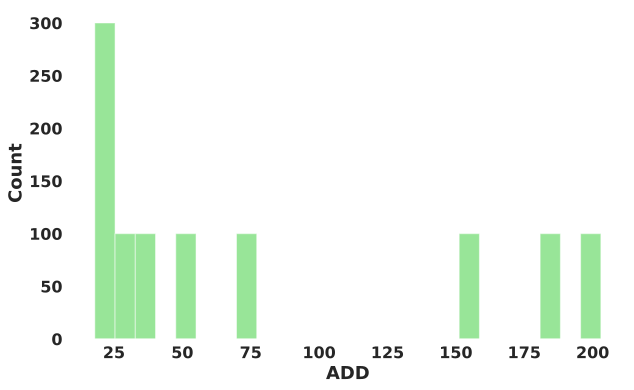

In [32]:
#Display the histogram of average detection delays
import matplotlib.pyplot as plt
from matplotlib import rcParams

fig, ax = plt.subplots(figsize=(10, 6))
rcParams['font.weight'] = 'bold'
count, bins, ignored = plt.hist(AvgDD, 25, color = "limegreen", alpha=0.5)
#plt.plot(bins, 1/(std * np.sqrt(2 * np.pi)) *
#               np.exp( - (bins - mu)**2 / (2 * std**2) ),
#         linewidth=2, color='r')
plt.rcParams['axes.facecolor'] = 'white'
plt.grid(visible=None)
#ax.axvline(x=0.86, color='black', linestyle='--', label='Reference mean', linewidth=2.0)
ax.set_xlabel('ADD', fontsize=18, fontweight='bold')
ax.set_ylabel('Count', fontsize=18, fontweight='bold')
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
ax.legend(fontsize=16, frameon=False)
#plt.title('mean=0.837',fontsize=14)
plt.show()
#plt.savefig('Gauss-in-control-AUC.png')
#plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


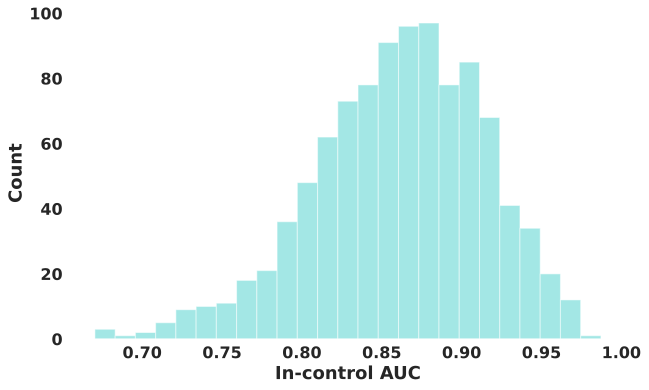

In [16]:
# PLOT THE HISTOGRAM OF AUCs

mu   = np.mean(in_control_auc)
mu_1 = np.mean(out_control_auc)
std  = np.std(in_control_auc)
std_1  = np.std(out_control_auc)

#Display the histogram of in-control AUC, along with the probability density function
import matplotlib.pyplot as plt
from matplotlib import rcParams

fig, ax = plt.subplots(figsize=(10, 6))
rcParams['font.weight'] = 'bold'
count, bins, ignored = plt.hist(in_control_auc, 25, color = "mediumturquoise", alpha=0.5)
#plt.plot(bins, 1/(std * np.sqrt(2 * np.pi)) *
#               np.exp( - (bins - mu)**2 / (2 * std**2) ),
#         linewidth=2, color='r')
plt.rcParams['axes.facecolor'] = 'white'
plt.grid(visible=None)
#ax.axvline(x=0.86, color='black', linestyle='--', label='Reference mean', linewidth=2.0)
ax.set_xlabel('In-control AUC', fontsize=18, fontweight='bold')
ax.set_ylabel('Count', fontsize=18, fontweight='bold')
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
ax.legend(fontsize=16, frameon=False)
#plt.title('mean=0.837',fontsize=14)
plt.show()
#plt.savefig('Gauss-in-control-AUC.png')
#plt.show()

#Display the histogram of out-of-control AUC, along with the probability density function
import matplotlib.pyplot as plt
#count, bins, ignored = plt.hist(out_control_auc, 25, color = "coral")
#plt.plot(bins, 1/(std_1 * np.sqrt(2 * np.pi)) *
#               np.exp( - (bins - mu_1)**2 / (2 * std_1**2) ),
#         linewidth=2, color='r')
#plt.rcParams['axes.facecolor'] = 'white'
#plt.grid(visible=None)
#lt.savefig('Gauss-out-of-control-AUC.png')
#plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


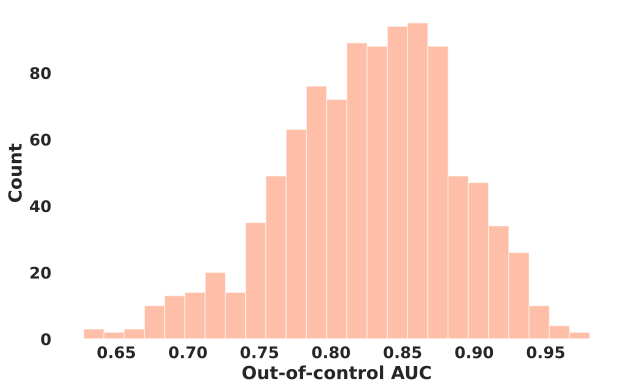

In [17]:
#Display the histogram of out-of-control AUC, along with the probability density function
import matplotlib.pyplot as plt
from matplotlib import rcParams

fig, ax = plt.subplots(figsize=(10, 6))
rcParams['font.weight'] = 'bold'
count, bins, ignored = plt.hist(out_control_auc, 25, color = "coral", alpha=0.5)
#plt.plot(bins, 1/(std_1 * np.sqrt(2 * np.pi)) *
#               np.exp( - (bins - mu_1)**2 / (2 * std_1**2) ),
#         linewidth=2, color='r')
plt.rcParams['axes.facecolor'] = 'white'
plt.grid(visible=None)
#ax.axvline(x=0.86, color='black', linestyle='--', label='Reference mean', linewidth=2.0)
ax.set_xlabel('Out-of-control AUC', fontsize=18, fontweight='bold')
ax.set_ylabel('Count', fontsize=18, fontweight='bold')
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
ax.legend(fontsize=16, frameon=False)
#plt.savefig('Gauss-out-of-control-AUC.png')
plt.show()

In [47]:
np.mean(sp_pre)
#np.mean(sp_post)

0.86290504

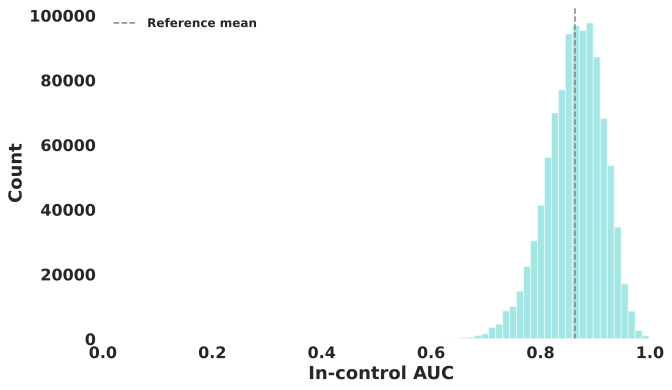

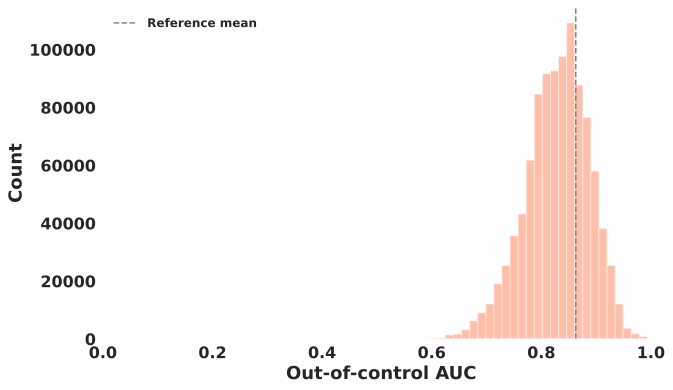

In [18]:
# PLOT THE HISTOGRAM OF all AUCs - all the AUCs for 1000 simulations * 1000 days 
from matplotlib import rcParams
#Display the histogram of in-control AUC, along with the probability density function
import matplotlib.pyplot as plt
rcParams['font.weight'] = 'bold'
fig, ax = plt.subplots(figsize=(10, 6))
locs = ["upper right", "lower right", "center right"]
count, bins, ignored = plt.hist(sp_pre, 30, color = "mediumturquoise", alpha=0.5)
#plt.plot(bins, 1/(std * np.sqrt(2 * np.pi)) *
#               np.exp( - (bins - mu)**2 / (2 * std**2) ),
#         linewidth=2, color='r')
plt.rcParams['axes.facecolor'] = 'white'
plt.grid(visible=None)
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.axvline(x=np.mean(sp_pre), color='grey', linestyle='--', label='Reference mean')  
ax.set_xlabel('In-control AUC', fontsize=18, fontweight='bold')
ax.set_ylabel('Count', fontsize=18, fontweight='bold')
ax.legend(loc=2, fontsize=12, frameon=False)
#plt.xticks([0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95])
#plt.title('mean=0.86',fontsize=14)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.show()

#Display the histogram of out-of-control AUC, along with the probability density function
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.weight'] = 'bold'
fig, ax = plt.subplots(figsize=(10, 6))
locs = ["upper right", "lower right", "center right"]
count, bins, ignored = plt.hist(sp_post, 30, color = "coral",alpha=0.5)
#plt.plot(bins, 1/(std_1 * np.sqrt(2 * np.pi)) *
#               np.exp( - (bins - mu_1)**2 / (2 * std_1**2) ),
#         linewidth=2, color='r')
plt.rcParams['axes.facecolor'] = 'white'
plt.grid(visible=None)
#plt.xticks([0.725, 0.750, 0.775, 0.800, 0.825, 0.850, 0.875, 0.900, 0.925, 0.950])
#plt.xticks([0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95])
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.axvline(x=np.mean(sp_pre), color='grey', linestyle='--', label='Reference mean')
ax.set_xlabel('Out-of-control AUC', fontsize=18, fontweight='bold')
ax.set_ylabel('Count', fontsize=18, fontweight='bold')
ax.legend(loc=2, fontsize=12, frameon=False)
#plt.title('mean=0.83', fontsize=14)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.show()

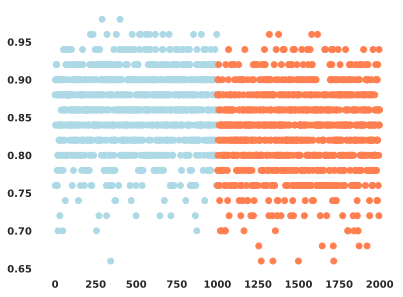

In [21]:
#Plot the AUCs
pre_change_days  = 1000
post_change_days = 1000
total_days       = pre_change_days + post_change_days
plt.rcParams['axes.facecolor'] = 'white'
plt.grid(b=None)
y1 = np.arange(pre_change_days)
x1 = test_AUC[:pre_change_days]
plt.scatter(y1, x1, c='lightblue')
y2 = np.arange(pre_change_days, total_days, 1)
x2 = test_AUC[pre_change_days:total_days]
plt.scatter(y2, x2, c='coral')
#plt.hlines(y = mu, xmin=0, xmax=pre_change_days,color = 'grey', linestyle = '--')
#plt.hlines(y = mu_1, xmin=pre_change_days, xmax=total_days,color = 'grey', linestyle = '--')
# single vline with specific ymin and ymax
#plt.vlines(x=pre_change_days, ymin=mu_1, ymax=mu, colors='grey', linestyle = '--')
#yline(0.86)
#plt.plot(test_AUC, 'go')


#plt.title('Input AUCs')
#plt.savefig('Gauss-inputAUCs.png')
#plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

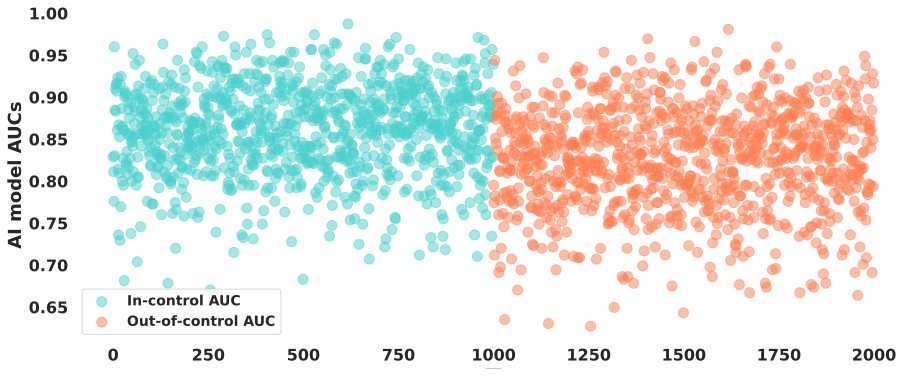

In [19]:
#Plot the input  AUCs
from matplotlib import rcParams
fig, ax = plt.subplots(figsize=(15, 6))
rcParams['font.weight'] = 'bold'

pre_change_days  = 1000
post_change_days = 1000
total_days       = pre_change_days + post_change_days
plt.rcParams['axes.facecolor'] = 'white'
plt.grid(b=None)
y1 = np.arange(pre_change_days)
x1 = test_AUC[:pre_change_days]
plt.scatter(y1, x1, c='mediumturquoise', s=100, alpha=0.5, label='In-control AUC')
y2 = np.arange(pre_change_days, total_days, 1)
x2 = test_AUC[pre_change_days:total_days]
plt.scatter(y2, x2, c='coral', s=100, alpha=0.5, label='Out-of-control AUC')
#plt.hlines(y = mu, xmin=0, xmax=pre_change_days,color = 'grey', linestyle = '--')
#plt.hlines(y = mu_1, xmin=pre_change_days, xmax=total_days,color = 'grey', linestyle = '--')
# single vline with specific ymin and ymax
#plt.vlines(x=pre_change_days, ymin=mu_1, ymax=mu, colors='grey', linestyle = '--')
#yline(0.86)
#plt.plot(test_AUC, 'go')

ax.legend(fontsize=14)
rcParams["legend.loc"] = 'upper right'
plt.rcParams['axes.facecolor'] = 'white'
#plt.title('Samples drawn from two Gaussians')
ax.set_xlabel('Length of Simulation (days)', fontsize=1, fontweight='bold')
ax.set_ylabel('AI model AUCs', fontsize=18, fontweight='bold')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(visible=None)
plt.show

In [38]:
print("mu_0:",mu)
print("mu_1",mu_1)
print("std - in-control",std)
print("std - out-of-control", std_1)

mu_0: 0.8608704
mu_1 0.8268096
std - in-control 0.05338988222350748
std - out-of-control 0.06020239918674338


In [20]:
test_AUC[:pre_change_days]

array([0.83, 0.81, 0.78, 0.96, 0.83, 0.88, 0.91, 0.88, 0.92, 0.91, 0.92,
       0.86, 0.92, 0.81, 0.74, 0.87, 0.81, 0.85, 0.73, 0.92, 0.77, 0.92,
       0.89, 0.86, 0.80, 0.87, 0.83, 0.80, 0.86, 0.68, 0.90, 0.91, 0.90,
       0.90, 0.82, 0.82, 0.84, 0.86, 0.81, 0.89, 0.88, 0.82, 0.88, 0.85,
       0.86, 0.83, 0.89, 0.74, 0.85, 0.80, 0.85, 0.84, 0.95, 0.81, 0.85,
       0.89, 0.87, 0.88, 0.94, 0.90, 0.90, 0.80, 0.86, 0.70, 0.80, 0.83,
       0.80, 0.91, 0.90, 0.94, 0.88, 0.86, 0.75, 0.84, 0.88, 0.87, 0.90,
       0.90, 0.86, 0.89, 0.88, 0.85, 0.91, 0.87, 0.86, 0.92, 0.88, 0.86,
       0.87, 0.89, 0.78, 0.85, 0.88, 0.85, 0.84, 0.86, 0.83, 0.92, 0.82,
       0.82, 0.84, 0.92, 0.77, 0.90, 0.87, 0.77, 0.91, 0.92, 0.86, 0.87,
       0.86, 0.84, 0.88, 0.81, 0.86, 0.84, 0.83, 0.82, 0.82, 0.83, 0.79,
       0.91, 0.85, 0.87, 0.83, 0.83, 0.83, 0.76, 0.86, 0.88, 0.91, 0.96,
       0.93, 0.90, 0.81, 0.88, 0.83, 0.87, 0.90, 0.88, 0.80, 0.81, 0.86,
       0.82, 0.68, 0.88, 0.92, 0.88, 0.84, 0.80, 0.

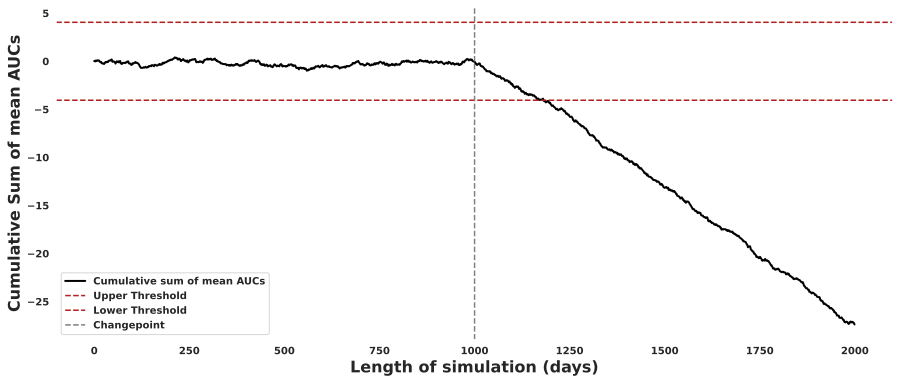

In [87]:

fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(cusum, '-k', linewidth=2, label='Cumulative sum of mean AUCs')
# Plot control limits
ax.axhline(h/std, color='firebrick', linestyle='--', label='Upper Threshold')  
ax.axhline(-h/std, color='firebrick', linestyle='--', label='Lower Threshold')  
# Indicate the start of the shift
ax.axvline(x=1000, color='grey', linestyle='--', label='Changepoint')  
#ax.fill_between(x=1000,y=-h/std,y1=h/std, where=cusum<y1, alpha=0.5)
#ax.axvspan(1000, 1122.8, ymin=-h/std, ymax=h/std, alpha=0.5, color='lightgrey', label='Detection Delay')
#for i, val in enumerate(cusum):
#    if val > h/std or val < -h/std:
#        ax.scatter(i, val, color='black', marker='o', s=20)  #  out-of-control points
ax.set_xlabel('Length of simulation (days)', fontsize=16, fontweight='bold')
ax.set_ylabel('Cumulative Sum of mean AUCs', fontsize=16, fontweight='bold')
#plt.title('Cumulative Sum')
ax.legend()
plt.show()

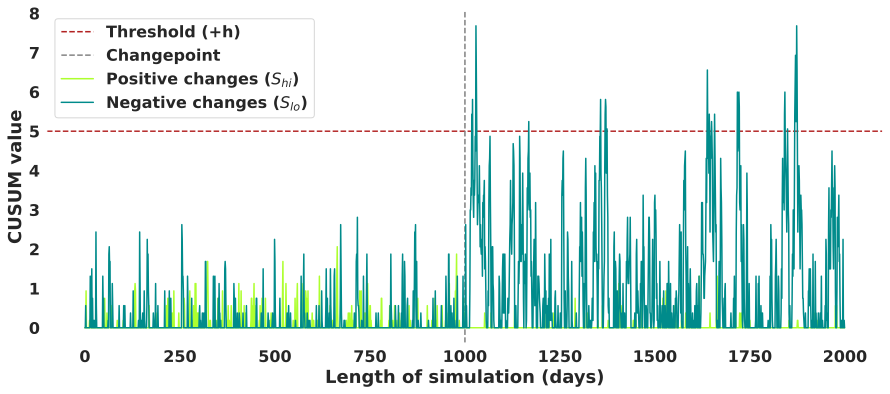

In [21]:
#Plot CUSUM of positive and negative changes
from matplotlib import rcParams

fig, ax = plt.subplots(figsize=(15, 6))
plt.rcParams['axes.facecolor'] = 'white'
plt.grid(visible=None)

rcParams['font.weight'] = 'bold'
rcParams["legend.loc"] = 'upper left'
# Plot control limits
ax.axhline(h/std, color='firebrick', linestyle='--', label='Threshold (+h)')  
# Indicate the start of the shift
ax.axvline(x=1000, color='grey', linestyle='--', label='Changepoint')  
#ax.axhline(-h/std, color='firebrick', linestyle='--', label='Lower Threshold') 
ax.plot(S_hi/std,  'greenyellow', label='Positive changes ($S_{hi}$)')
#ax.plot(S_hi/std,  'blueviolet', label='positive changes ')
ax.plot(S_lo/std, 'darkcyan', label='Negative changes ($S_{lo}$)')
#ax.plot(S_lo/std, 'skyblue', label='negative changes')
#for i, val in enumerate(S_lo/std):
#    if val > h/std and i>1000:
#        ax.scatter(i, val, color='darkcyan', marker='o', s=20)  #  True Positivies
#for i, val in enumerate(S_hi/std):
#    if val > h/std and i<1000:
#        ax.scatter(i, val, color='red', marker='o', s=20)       #  False Positivies
#for i, val in enumerate(S_lo/std):
#    if val > h/std and i<1000:
#        ax.scatter(i, val, color='red', marker='o', s=20)       #  False Positivies

# Update the legend
legend_elements = [#plt.Line2D([0], [0], color='darkcyan',  marker='o',     label='True Detections'),
                   #plt.Line2D([0], [0], color='red',       marker='o',     label='False Detections'),
                   plt.Line2D([0], [0], color='firebrick', linestyle='--', label='Threshold (+h)'),
                   plt.Line2D([0], [0], color='grey',      linestyle='--', label='Changepoint'),
                   plt.Line2D([0], [0], color='greenyellow',               label='Positive changes'),
                   plt.Line2D([0], [0], color='darkcyan',                  label='Negative changes')
                  ]
legend_properties = {'weight':'bold'}
ax.legend(handles=legend_elements,prop=legend_properties)
ax.set_xlabel('Length of simulation (days)', fontsize=18, fontweight='bold')
ax.set_ylabel('CUSUM value', fontsize=18, fontweight='bold')
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
ax.legend(fontsize=16)
plt.show()

In [22]:
h/std

5.0